In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('accepted_2007_to_2018Q4.csv')

/Users/lebawilamowsky/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
#data cleaning

In [3]:
data=data[(data['loan_status']=='Fully Paid')| (data['loan_status']=='Charged Off')]

In [4]:
data.shape

(1345310, 151)

In [5]:
data=data[data['funded_amnt_inv']==data['loan_amnt']]

In [6]:
data.shape

(1230694, 151)

In [7]:
#columns that are known at loan origination and MAY be useful for model
data=data[['acc_open_past_24mths','addr_state','all_util','annual_inc','application_type','avg_cur_bal',
           'delinq_2yrs','dti','emp_length',
      'fico_range_high','fico_range_low','funded_amnt_inv','grade','home_ownership', 
      'inq_fi','initial_list_status','inq_last_12m','inq_last_6mths','installment','int_rate',
      'issue_d','loan_amnt','loan_status','mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
           'mths_since_last_delinq',
      'mths_since_last_major_derog','mths_since_last_record','mths_since_rcnt_il','mths_since_recent_bc',
      'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','mort_acc',
      'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl',
      'num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_90g_dpd_24m',
      'num_tl_op_past_12m','open_acc','open_acc_6m','open_il_12m','open_il_24m','open_act_il',
      'open_rv_12m','open_rv_24m','pct_tl_nvr_dlq','percent_bc_gt_75','revol_bal','revol_util',
      'pub_rec','pub_rec_bankruptcies','purpose','sub_grade','tax_liens','term','tot_coll_amt',
      'total_acc','total_pymnt_inv','total_cu_tl','verification_status']]
      

In [8]:
data.shape

(1230694, 68)

In [9]:
data = data.sort_values(by='issue_d')

In [10]:
data[['issue_d']].sample(5)

,issue_d
447195,Mar-2018
117152,Oct-2015
1127749,Nov-2014
1320655,Mar-2014
1643488,Mar-2010


In [11]:
data['issue_d'].dtypes

dtype('O')

In [12]:
data['issue_d'].head(10)

1650791    Apr-2008
1650758    Apr-2008
1650749    Apr-2008
1650743    Apr-2008
1650739    Apr-2008
1650723    Apr-2008
1648733    Apr-2009
1648869    Apr-2009
1648852    Apr-2009
1648837    Apr-2009
Name: issue_d, dtype: object

In [13]:
data['year']=data['issue_d'].astype(str).str[-4:]

In [14]:
data[['issue_d','year']].sample(10)

,issue_d,year
245989,Jun-2015,2015
1058653,Feb-2016,2016
875879,Jul-2018,2018
2021738,Jul-2016,2016
1838488,Jun-2013,2013
1776147,Nov-2013,2013
144306,Sep-2015,2015
1333195,Feb-2014,2014
979621,Apr-2017,2017
1154026,Nov-2014,2014


In [15]:
data['issue_d'].value_counts()

Mar-2016    44717
Oct-2015    39851
Dec-2015    36547
Jul-2015    36230
Oct-2014    34805
            ...  
Dec-2008        5
Jan-2008        4
Nov-2008        3
Feb-2008        3
Aug-2007        1
Name: issue_d, Length: 127, dtype: int64

In [16]:
#data before 2016 missing features so get rid of those rows
#so we are analyzing data 2016-2018
data=data[(data['year']=='2016')| (data['year']=='2017')| (data['year']=='2018')]

In [17]:
data['application_type'].value_counts()

Individual    473119
Joint App      24080
Name: application_type, dtype: int64

In [18]:
#get rid of joint applications because we are analyzing
#attributes of an individual borrower
data=data[data['application_type']=='Individual']

In [19]:
data.shape

(473119, 69)

In [20]:
pd.set_option('display.max_rows', None)
pd.isnull(data).sum(axis=0)

acc_open_past_24mths                   0
addr_state                             0
all_util                              87
annual_inc                             0
application_type                       0
avg_cur_bal                            7
delinq_2yrs                            0
dti                                    0
emp_length                         30731
fico_range_high                        0
fico_range_low                         0
funded_amnt_inv                        0
grade                                  0
home_ownership                         0
inq_fi                                49
initial_list_status                    0
inq_last_12m                          50
inq_last_6mths                         1
installment                            0
int_rate                               0
issue_d                                0
loan_amnt                              0
loan_status                            0
mo_sin_old_il_acct                 12468
mo_sin_old_rev_t

In [21]:
#percent of data missing
(pd.isnull(data).sum(axis=0)/data.shape[0])*100

acc_open_past_24mths               0.000000
addr_state                         0.000000
all_util                           0.018389
annual_inc                         0.000000
application_type                   0.000000
avg_cur_bal                        0.001480
delinq_2yrs                        0.000000
dti                                0.000000
emp_length                         6.495406
fico_range_high                    0.000000
fico_range_low                     0.000000
funded_amnt_inv                    0.000000
grade                              0.000000
home_ownership                     0.000000
inq_fi                             0.010357
initial_list_status                0.000000
inq_last_12m                       0.010568
inq_last_6mths                     0.000211
installment                        0.000000
int_rate                           0.000000
issue_d                            0.000000
loan_amnt                          0.000000
loan_status                     

In [22]:
#we can drop many of the features that have so much missing data because anyway the
#FICO score and grade takes into account these features. They're not really necessary.
data.drop(['mo_sin_old_il_acct','mths_since_last_delinq','mths_since_last_delinq',
          'mths_since_last_major_derog',
          'mths_since_last_record','mths_since_rcnt_il','mths_since_recent_bc',
          'mths_since_recent_bc_dlq','percent_bc_gt_75','mths_since_recent_inq',
          'mths_since_recent_revol_delinq','percent_bc_gt_75'],axis=1, inplace=True)

In [23]:
data.shape

(473119, 59)

In [24]:
data.isnull().sum()

acc_open_past_24mths         0
addr_state                   0
all_util                    87
annual_inc                   0
application_type             0
avg_cur_bal                  7
delinq_2yrs                  0
dti                          0
emp_length               30731
fico_range_high              0
fico_range_low               0
funded_amnt_inv              0
grade                        0
home_ownership               0
inq_fi                      49
initial_list_status          0
inq_last_12m                50
inq_last_6mths               1
installment                  0
int_rate                     0
issue_d                      0
loan_amnt                    0
loan_status                  0
mo_sin_old_rev_tl_op         0
mort_acc                     0
num_accts_ever_120_pd        0
num_actv_bc_tl               0
num_actv_rev_tl              0
num_bc_sats                  0
num_bc_tl                    0
num_il_tl                    0
num_op_rev_tl                0
num_rev_

In [25]:
#get rid of rows where these are na, since na randomly. and only a tiny portion 
#of the rows anyway, so not a big deal
data.dropna(subset=['all_util','avg_cur_bal','dti','inq_fi','inq_last_12m','inq_last_6mths',
            'open_acc_6m','open_il_12m','open_il_24m','open_act_il','open_rv_12m','open_rv_24m',
            'pct_tl_nvr_dlq','revol_util','total_cu_tl'],inplace=True)

In [26]:
data.shape

(472714, 59)

In [27]:
data[data['emp_length'].isnull()==True].sample(5)

,acc_open_past_24mths,addr_state,all_util,annual_inc,application_type,avg_cur_bal,delinq_2yrs,dti,emp_length,fico_range_high,...,purpose,sub_grade,tax_liens,term,tot_coll_amt,total_acc,total_pymnt_inv,total_cu_tl,verification_status,year
1661756,2.0,MS,24.0,80000.0,Individual,3009.0,0.0,14.68,NaN,794.0,...,debt_consolidation,A5,0.0,36 months,0.0,30.0,22137.30,0.0,Verified,2017
2188743,1.0,KS,39.0,21435.0,Individual,1171.0,0.0,5.04,NaN,729.0,...,credit_card,A5,0.0,36 months,0.0,16.0,5471.02,1.0,Verified,2016
662402,7.0,GA,51.0,64970.0,Individual,11608.0,0.0,18.53,NaN,679.0,...,debt_consolidation,B5,0.0,36 months,101.0,34.0,5172.21,0.0,Source Verified,2016
924145,3.0,OH,32.0,20232.0,Individual,17180.0,0.0,9.25,NaN,744.0,...,debt_consolidation,A5,0.0,36 months,0.0,17.0,7522.50,0.0,Verified,2017
1065124,1.0,OH,97.0,36000.0,Individual,8796.0,1.0,10.40,NaN,664.0,...,other,B5,0.0,36 months,0.0,18.0,5228.69,5.0,Verified,2016


In [28]:
#seeems like length missing because unemployed
data['emp_length'].fillna('None', inplace=True)

In [29]:
pd.isnull(data).sum(axis=0)

acc_open_past_24mths     0
addr_state               0
all_util                 0
annual_inc               0
application_type         0
avg_cur_bal              0
delinq_2yrs              0
dti                      0
emp_length               0
fico_range_high          0
fico_range_low           0
funded_amnt_inv          0
grade                    0
home_ownership           0
inq_fi                   0
initial_list_status      0
inq_last_12m             0
inq_last_6mths           0
installment              0
int_rate                 0
issue_d                  0
loan_amnt                0
loan_status              0
mo_sin_old_rev_tl_op     0
mort_acc                 0
num_accts_ever_120_pd    0
num_actv_bc_tl           0
num_actv_rev_tl          0
num_bc_sats              0
num_bc_tl                0
num_il_tl                0
num_op_rev_tl            0
num_rev_accts            0
num_rev_tl_bal_gt_0      0
num_sats                 0
num_tl_90g_dpd_24m       0
num_tl_op_past_12m       0
o

In [180]:
data.dtypes

acc_open_past_24mths                  float64
addr_state                             object
all_util                              float64
annual_inc                            float64
application_type                       object
avg_cur_bal                           float64
delinq_2yrs                           float64
dti                                   float64
emp_length                             object
fico_range_high                       float64
fico_range_low                        float64
funded_amnt_inv                       float64
grade                                  object
home_ownership                         object
inq_fi                                float64
initial_list_status                    object
inq_last_12m                          float64
inq_last_6mths                        float64
installment                           float64
int_rate                              float64
issue_d                                object
loan_amnt                         

In [179]:
data['avg_fico_score']=(data['fico_range_high']+data['fico_range_low'])/2

In [32]:
data[['avg_fico_score','fico_range_high','fico_range_low']].sample(10)

,avg_fico_score,fico_range_high,fico_range_low
480345,667.0,669.0,665.0
726852,667.0,669.0,665.0
1054285,687.0,689.0,685.0
1983406,732.0,734.0,730.0
928245,702.0,704.0,700.0
2028433,692.0,694.0,690.0
988178,677.0,679.0,675.0
1012550,712.0,714.0,710.0
2259984,692.0,694.0,690.0
1716631,687.0,689.0,685.0


In [136]:
data['Profit_Percentage_Inv']= round(((data['total_pymnt_inv']-data['funded_amnt_inv']) / data['funded_amnt_inv'])*100)

In [207]:
data[['funded_amnt_inv','total_pymnt_inv','loan_status','Profit_Percentage_Inv']].sample(7)

,funded_amnt_inv,total_pymnt_inv,loan_status,Profit_Percentage_Inv
455577,6025.0,210.37,Charged Off,-97.0
706478,9600.0,10564.75,Fully Paid,10.0
1116923,16800.0,19434.10,Fully Paid,16.0
1706993,15000.0,17219.36,Fully Paid,15.0
641865,22075.0,23578.78,Fully Paid,7.0
1990308,6000.0,3307.18,Charged Off,-45.0
2163219,20000.0,23879.92,Fully Paid,19.0


In [138]:
data['Profit_Percentage_Inv'].value_counts().sort_index()

-100.0      619
-99.0        15
-98.0       149
-97.0       510
-96.0       299
-95.0       244
-94.0       397
-93.0       786
-92.0       406
-91.0       462
-90.0       965
-89.0       678
-88.0       568
-87.0      1049
-86.0      1250
-85.0       850
-84.0      1261
-83.0      1419
-82.0      1180
-81.0      1353
-80.0      1698
-79.0      1388
-78.0      1428
-77.0      1727
-76.0      1589
-75.0      1576
-74.0      1817
-73.0      1696
-72.0      1615
-71.0      1746
-70.0      1717
-69.0      1767
-68.0      1844
-67.0      1796
-66.0      1794
-65.0      1747
-64.0      1824
-63.0      1802
-62.0      1717
-61.0      1703
-60.0      1811
-59.0      1738
-58.0      1581
-57.0      1703
-56.0      1644
-55.0      1454
-54.0      1767
-53.0      1572
-52.0      1590
-51.0      1522
-50.0      1474
-49.0      1509
-48.0      1379
-47.0      1369
-46.0      1364
-45.0      1353
-44.0      1301
-43.0      1232
-42.0      1271
-41.0      1191
-40.0      1126
-39.0      1119
-38.0   

In [315]:
data.shape

(472714, 74)

In [140]:
.05*472714

23635.7

In [181]:
.10*472714

47271.4

In [141]:
def f(df):
    if df['Profit_Percentage_Inv'] < 25:
        val = 'Remaining loans'
    else:
        val = 'The ~5% of loans with highest profit percentage'
    return val

In [142]:
data['Profit_Percentage_Inv_Range']= data.apply(f, axis=1)

In [143]:
data['Profit_Percentage_Inv_Range'].value_counts()

Remaining loans                                    450028
The ~5% of loans with highest profit percentage     22686
Name: Profit_Percentage_Inv_Range, dtype: int64

In [42]:
#need to encode 'addr_state','emp_length','grade', 'home_ownership','purpose', 
#               'sub_grade', 'term', 'verification_status','initial_list_status'

In [43]:
data['emp_length'].value_counts()

10+ years    160559
2 years       44187
3 years       38893
< 1 year      34805
1 year        32323
None          30693
5 years       29454
4 years       28906
6 years       20693
8 years       18278
9 years       17514
7 years       16409
Name: emp_length, dtype: int64

In [44]:
#encode emp_length
import numpy as np
conditions = [
    (data['emp_length'] == '1 year'),
    (data['emp_length'] == '10+ years'),
    (data['emp_length'] == '2 years'),
    (data['emp_length'] == '3 years'),
    (data['emp_length'] == '4 years'),
    (data['emp_length'] == '5 years'),
    (data['emp_length'] == '6 years'),
    (data['emp_length'] == '7 years'),
    (data['emp_length'] == '8 years'),
    (data['emp_length'] == '9 years'),
    (data['emp_length'] == '< 1 year'),
    (data['emp_length']=='None')
    ]
values = [1, 10, 2, 3, 4, 5, 6, 7, 8, 9, .5, 0]
data['emp_length_enc']=np.select(conditions, values)

In [45]:
#encode grade
data['grade'].value_counts()

C    143606
B    139012
A     82331
D     67075
E     27710
F      9569
G      3411
Name: grade, dtype: int64

In [46]:
conditions = [
    (data['grade'] == 'A'),
    (data['grade'] == 'B'),
    (data['grade'] == 'C'),
    (data['grade'] == 'D'),
    (data['grade'] == 'E'),
    (data['grade'] == 'F'),
    (data['grade'] == 'G')
    ]

values = [1, 2, 3, 4, 5, 6, 7]
data['grade_enc']=np.select(conditions, values)

In [47]:
data['sub_grade'].value_counts().sort_index()

A1    19628
A2    13623
A3    13474
A4    16524
A5    19082
B1    25790
B2    24943
B3    26357
B4    28745
B5    33177
C1    33120
C2    28456
C3    26902
C4    27940
C5    27188
D1    16803
D2    15825
D3    13595
D4    11348
D5     9504
E1     6809
E2     5755
E3     5214
E4     4743
E5     5189
F1     2997
F2     2029
F3     1738
F4     1476
F5     1329
G1     1008
G2      702
G3      610
G4      585
G5      506
Name: sub_grade, dtype: int64

In [48]:
conditions = [
    (data['sub_grade'] == 'A1'),
    (data['sub_grade'] == 'A2'),
    (data['sub_grade'] == 'A3'),
    (data['sub_grade'] == 'A4'),
    (data['sub_grade'] == 'A5'),
    (data['sub_grade'] == 'B1'),
    (data['sub_grade'] == 'B2'),
    (data['sub_grade'] == 'B3'),
    (data['sub_grade'] == 'B4'),
    (data['sub_grade'] == 'B5'),
    (data['sub_grade'] == 'C1'),
    (data['sub_grade'] == 'C2'),
    (data['sub_grade'] == 'C3'),
    (data['sub_grade'] == 'C4'),
    (data['sub_grade'] == 'C5'),
    (data['sub_grade'] == 'D1'),
    (data['sub_grade'] == 'D2'),
    (data['sub_grade'] == 'D3'),
    (data['sub_grade'] == 'D4'),
    (data['sub_grade'] == 'D5'),
    (data['sub_grade'] == 'E1'),
    (data['sub_grade'] == 'E2'),
    (data['sub_grade'] == 'E3'),
    (data['sub_grade'] == 'E4'),
    (data['sub_grade'] == 'E5'),
    (data['sub_grade'] == 'F1'),
    (data['sub_grade'] == 'F2'),
    (data['sub_grade'] == 'F3'),
    (data['sub_grade'] == 'F4'),
    (data['sub_grade'] == 'F5'),
    (data['sub_grade'] == 'G1'),
    (data['sub_grade'] == 'G2'),
    (data['sub_grade'] == 'G3'),
    (data['sub_grade'] == 'G4'),
    (data['sub_grade'] == 'G5')
    ]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
data['sub_grade_enc']=np.select(conditions, values)


In [49]:
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder = OrdinalEncoder()

In [50]:
#create new columns, fill with random info because about to change it anyway
data[['addr_state_enc']]=data[['initial_list_status']]
data[['home_ownership_enc']]=data[['initial_list_status']]
data[['purpose_enc']]=data[['initial_list_status']]
data[['term_enc']]=data[['initial_list_status']]
data[['verification_status_enc']]=data[['initial_list_status']]
data[['initial_list_status_enc']]=data[['initial_list_status']]

In [51]:
data[['addr_state_enc']]=ordinalencoder.fit_transform(data[['addr_state']])
data[['home_ownership_enc']]=ordinalencoder.fit_transform(data[['home_ownership']])
data[['purpose_enc']]=ordinalencoder.fit_transform(data[['purpose']])
data[['term_enc']]=ordinalencoder.fit_transform(data[['term']])
data[['verification_status_enc']]=ordinalencoder.fit_transform(data[['verification_status']])
data[['initial_list_status_enc']]=ordinalencoder.fit_transform(data[['initial_list_status']])

In [52]:
data.columns.values

array(['acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc',
       'application_type', 'avg_cur_bal', 'delinq_2yrs', 'dti',
       'emp_length', 'fico_range_high', 'fico_range_low',
       'funded_amnt_inv', 'grade', 'home_ownership', 'inq_fi',
       'initial_list_status', 'inq_last_12m', 'inq_last_6mths',
       'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status',
       'mo_sin_old_rev_tl_op', 'mort_acc', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
       'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'open_il_12m',
       'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m',
       'pct_tl_nvr_dlq', 'revol_bal', 'revol_util', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'sub_grade', 'tax_liens',
       'term', 'tot_coll_amt', 'total_acc', 'total_pymnt_inv',
       'total_cu_

In [54]:
features=data[['acc_open_past_24mths','all_util', 'annual_inc',
               'avg_cur_bal', 'delinq_2yrs', 'dti','inq_fi',
       'inq_last_12m', 'inq_last_6mths',
       'installment', 'int_rate', 'loan_amnt',
       'mo_sin_old_rev_tl_op', 'mort_acc', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
       'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'open_il_12m',
       'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m',
       'pct_tl_nvr_dlq', 'revol_bal', 'revol_util', 'pub_rec',
       'pub_rec_bankruptcies', 'tax_liens',
       'tot_coll_amt', 'total_acc',
       'total_cu_tl','avg_fico_score',
       'emp_length_enc', 'grade_enc', 'sub_grade_enc', 'addr_state_enc',
       'home_ownership_enc', 'purpose_enc', 'term_enc',
       'verification_status_enc','initial_list_status_enc']]

In [55]:
features.shape

(472714, 52)

In [56]:
features.dtypes

acc_open_past_24mths       float64
all_util                   float64
annual_inc                 float64
avg_cur_bal                float64
delinq_2yrs                float64
dti                        float64
inq_fi                     float64
inq_last_12m               float64
inq_last_6mths             float64
installment                float64
int_rate                   float64
loan_amnt                  float64
mo_sin_old_rev_tl_op       float64
mort_acc                   float64
num_accts_ever_120_pd      float64
num_actv_bc_tl             float64
num_actv_rev_tl            float64
num_bc_sats                float64
num_bc_tl                  float64
num_il_tl                  float64
num_op_rev_tl              float64
num_rev_accts              float64
num_rev_tl_bal_gt_0        float64
num_sats                   float64
num_tl_90g_dpd_24m         float64
num_tl_op_past_12m         float64
open_acc                   float64
open_acc_6m                float64
open_il_12m         

In [149]:
target=data[['Profit_Percentage_Inv_Range']]

In [150]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.3, random_state=42)

In [151]:
target['Profit_Percentage_Inv_Range'].value_counts()

Remaining loans                                    450028
The ~5% of loans with highest profit percentage     22686
Name: Profit_Percentage_Inv_Range, dtype: int64

In [146]:
from imblearn.ensemble import BalancedBaggingClassifier

In [152]:
baggingclassifier=BalancedBaggingClassifier(n_estimators=700,n_jobs=-1)

In [153]:
baggingclassifier.fit(xtrain, ytrain.values.ravel())

BalancedBaggingClassifier(n_estimators=700, n_jobs=-1)

In [154]:
baggingclassifier.score(xtrain, ytrain.values.ravel())

0.8282225089831036

In [155]:
baggingclassifier.score(xtest, ytest.values.ravel())

0.8188978598878821

In [167]:
print(np.mean([est.steps[1][1].feature_importances_ for est in baggingclassifier.estimators_], axis=0))

[0.00748043 0.01431635 0.01491257 0.01718542 0.00308331 0.0175648
 0.00577605 0.0079603  0.00397289 0.01218425 0.08157909 0.00965706
 0.01803905 0.00574293 0.00342397 0.0055827  0.00473149 0.00635878
 0.00825556 0.01009    0.00598126 0.00847936 0.00471886 0.00489443
 0.00152745 0.0051969  0.00494739 0.00465842 0.00371874 0.00535623
 0.006248   0.00425497 0.00620151 0.00914208 0.0155246  0.01699256
 0.00194254 0.00178514 0.00135414 0.00527628 0.01015713 0.00707124
 0.01122338 0.00742279 0.01290282 0.47168003 0.01328624 0.00240383
 0.00540861 0.07750932 0.00311596 0.00172079]


In [156]:
pd.crosstab(ytrain.squeeze(), baggingclassifier.predict(xtrain), rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,Remaining loans,The ~5% of loans with highest profit percentage,All
True,,,
Remaining loans,258141,56841,314982
The ~5% of loans with highest profit percentage,0,15917,15917
All,258141,72758,330899


In [157]:
pd.crosstab(ytest.squeeze(), baggingclassifier.predict(xtest), rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,Remaining loans,The ~5% of loans with highest profit percentage,All
True,,,
Remaining loans,109820,25226,135046
The ~5% of loans with highest profit percentage,457,6312,6769
All,110277,31538,141815


In [398]:
ytest.sample(5)

,Profit_Percentage_Inv_Range
1955821,Remaining loans
1710324,Remaining loans
2201480,Remaining loans
1097730,Remaining loans
2235566,Remaining loans


In [381]:
df=pd.merge(data[['Profit_Percentage_Inv']],ytest, how='right',left_index=True,right_index=True)

In [382]:
df['Predicted']=baggingclassifier.predict(xtest)

In [383]:
df.sample(10)

,Profit_Percentage_Inv,Profit_Percentage_Inv_Range,Predicted
1073800,-74.0,Remaining loans,The ~5% of loans with highest profit percentage
545262,10.0,Remaining loans,Remaining loans
901439,-58.0,Remaining loans,Remaining loans
2254219,13.0,Remaining loans,The ~5% of loans with highest profit percentage
912485,19.0,Remaining loans,Remaining loans
525466,11.0,Remaining loans,Remaining loans
523296,3.0,Remaining loans,Remaining loans
2225120,17.0,Remaining loans,Remaining loans
2010399,11.0,Remaining loans,Remaining loans
2056984,7.0,Remaining loans,Remaining loans


In [386]:
predictedwrong=df[df['Predicted']!=df['Profit_Percentage_Inv_Range']]

In [387]:
predictedwrong.sample(10)

,Profit_Percentage_Inv,Profit_Percentage_Inv_Range,Predicted
2240199,-42.0,Remaining loans,The ~5% of loans with highest profit percentage
2164215,-23.0,Remaining loans,The ~5% of loans with highest profit percentage
1666506,-40.0,Remaining loans,The ~5% of loans with highest profit percentage
1677152,-62.0,Remaining loans,The ~5% of loans with highest profit percentage
679037,13.0,Remaining loans,The ~5% of loans with highest profit percentage
2006538,8.0,Remaining loans,The ~5% of loans with highest profit percentage
1045651,-77.0,Remaining loans,The ~5% of loans with highest profit percentage
1059917,22.0,Remaining loans,The ~5% of loans with highest profit percentage
1078155,-49.0,Remaining loans,The ~5% of loans with highest profit percentage
707699,14.0,Remaining loans,The ~5% of loans with highest profit percentage


In [388]:
predictedwrongthatintop5=predictedwrong[predictedwrong['Profit_Percentage_Inv_Range']=='Remaining loans']

In [389]:
predictedwrongthatintop5['Profit_Percentage_Inv'].mean()

-18.50261634821216

In [397]:
df[df['Profit_Percentage_Inv_Range']=='Remaining loans']['Profit_Percentage_Inv'].mean()

-5.019112006279342

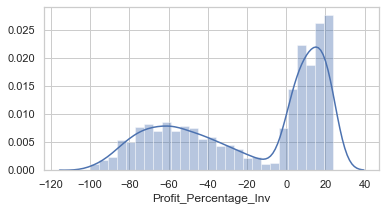

In [391]:
sns.distplot(predictedwrongthatintop5['Profit_Percentage_Inv'])

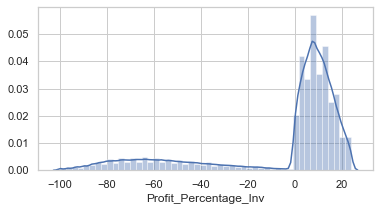

In [396]:
sns.distplot(df[df['Profit_Percentage_Inv_Range']=='Remaining loans']['Profit_Percentage_Inv'])

In [211]:
#Sensitivity:
6312/(6312+457)

0.9324863347614123

In [212]:
#Specificity:
109820/(109820+25226)

0.8132043896153903

In [303]:
feature_importance=pd.DataFrame(np.mean([est.steps[1][1].feature_importances_ for est in baggingclassifier.estimators_], axis=0),index=xtrain.columns,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

In [304]:
feature_importance.reset_index(level=0, inplace=True)

In [308]:
feature_importance.rename(columns={'index':'Feature'},inplace=True)

In [322]:
data['term_enc'].value_counts()

0.0    368289
1.0    104425
Name: term_enc, dtype: int64

In [309]:
feature_importance

,Feature,Feature Importance
0,sub_grade_enc,0.471680
1,int_rate,0.081579
2,term_enc,0.077509
3,mo_sin_old_rev_tl_op,0.018039
4,dti,0.017565
5,avg_cur_bal,0.017185
6,revol_util,0.016993
7,revol_bal,0.015525
8,annual_inc,0.014913
9,all_util,0.014316


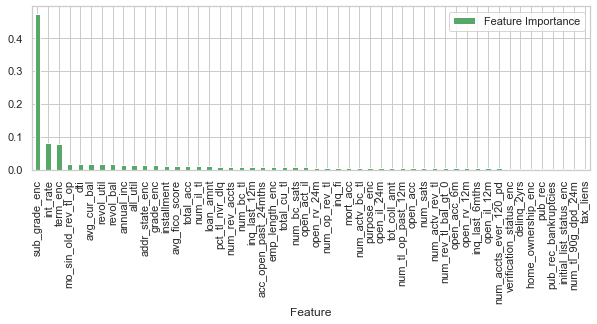

In [319]:
feature_importance.plot.bar(x='Feature',color='g')
plt.rcParams['figure.figsize']=(6,3)

In [171]:
data.groupby('Profit_Percentage_Inv_Range')['sub_grade_enc'].value_counts()

Profit_Percentage_Inv_Range                      sub_grade_enc
Remaining loans                                  10               33108
                                                 11               32899
                                                 9                28733
                                                 12               28033
                                                 14               27083
                                                 8                26357
                                                 13               26275
                                                 6                25790
                                                 15               25091
                                                 7                24943
                                                 1                19628
                                                 5                19082
                                                 4                16524
 

In [ ]:
data.groupby('Profit_Percentage_Inv_Range',)['sub_grade_enc'].value_counts()

In [213]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
data['Profit_Percentage_Inv_Range'].value_counts()

Remaining loans                                    450028
The ~5% of loans with highest profit percentage     22686
Name: Profit_Percentage_Inv_Range, dtype: int64

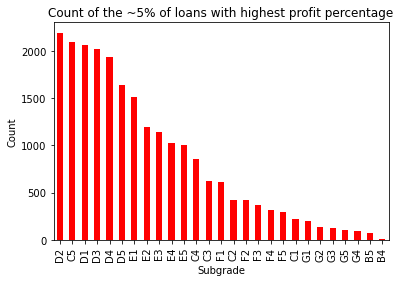

In [239]:
data[data['Profit_Percentage_Inv_Range']=='The ~5% of loans with highest profit percentage']['sub_grade'].value_counts().plot(kind="bar",color='r')
plt.xlabel('Subgrade')
plt.ylabel('Count')
plt.title('Count of the ~5% of loans with highest profit percentage')
plt.show()


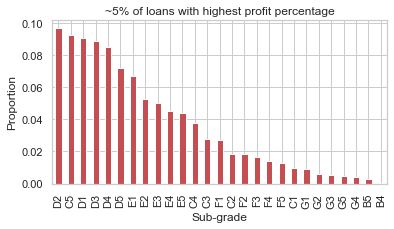

In [339]:
((data[data['Profit_Percentage_Inv_Range']=='The ~5% of loans with highest profit percentage']['sub_grade'].value_counts())/\
22686).plot(kind="bar",color='r')
plt.xlabel('Sub-grade')
plt.ylabel('Proportion')
plt.title('~5% of loans with highest profit percentage')
plt.show()

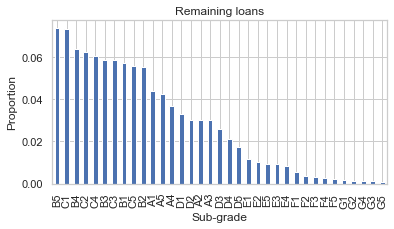

In [340]:
((data[data['Profit_Percentage_Inv_Range']!='The ~5% of loans with highest profit percentage']['sub_grade'].value_counts())\
/450028).plot(kind="bar",color='b')
plt.xlabel('Sub-grade')
plt.ylabel('Proportion')
plt.title('Remaining loans')
plt.show()

In [ ]:
int_rate

In [361]:
data[data['sub_grade']=='D5'][['int_rate','issue_d']].sample(30)

,int_rate,issue_d
1405219,22.35,Nov-2018
2033382,21.49,Jul-2016
2063897,21.45,Dec-2017
1112626,18.49,Jan-2016
1954019,21.49,Sep-2016
556858,21.45,Sep-2017
687584,19.99,May-2016
2145972,21.45,Oct-2017
500216,21.45,Jan-2018
992287,19.53,Mar-2016


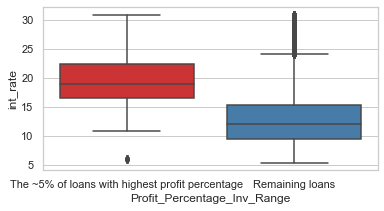

In [344]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="Profit_Percentage_Inv_Range", y="int_rate", order=['The ~5% of loans with highest profit percentage','Remaining loans'], data=data,palette="Set1")

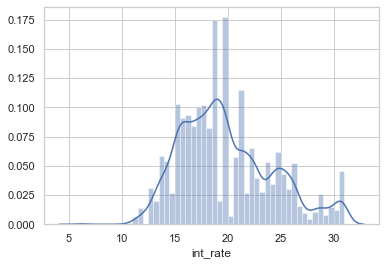

In [278]:
sns.distplot(data[data['Profit_Percentage_Inv_Range']=='The ~5% of loans with highest profit percentage']['int_rate'])


In [245]:
data[data['Profit_Percentage_Inv_Range']=='The ~5% of loans with highest profit percentage']['int_rate'].describe()



count    22686.000000
mean        19.868409
std          4.346390
min          6.000000
25%         16.590000
50%         18.990000
75%         22.450000
max         30.990000
Name: int_rate, dtype: float64

In [246]:
data[data['Profit_Percentage_Inv_Range']!='The ~5% of loans with highest profit percentage']['int_rate'].describe()


count    450028.000000
mean         12.948470
std           5.043347
min           5.310000
25%           9.440000
50%          11.990000
75%          15.310000
max          30.990000
Name: int_rate, dtype: float64

In [233]:
data[data['Profit_Percentage_Inv_Range']=='The ~5% of loans with highest profit percentage'].term.value_counts()

 60 months    11631
 36 months    11055
Name: term, dtype: int64

In [234]:
data[data['Profit_Percentage_Inv_Range']!='The ~5% of loans with highest profit percentage'].term.value_counts()

 36 months    357234
 60 months     92794
Name: term, dtype: int64

In [257]:
plotdata = pd.DataFrame({
    "60 months":[92794/(92794+357234),11631/(11631+11055)],
    "36 months":[357234/(92794+357234),11055/(11631+11055)],
    }, index=["Remaining loans", "The ~5% of loans with \n highest profit percentage"]
)
plotdata.head()

,60 months,36 months
Remaining loans,0.206196,0.793804
The ~5% of loans with \n highest profit percentage,0.512695,0.487305


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

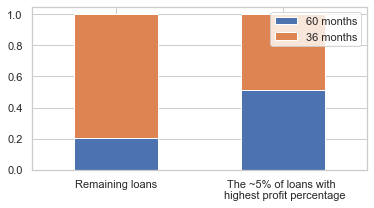

In [346]:
plotdata.plot(kind='bar',stacked='true')
plt.xticks(
    rotation=0)

In [272]:
data.groupby('Profit_Percentage_Inv_Range')['mo_sin_old_rev_tl_op'].mean()

Profit_Percentage_Inv_Range
Remaining loans                                    178.884389
The ~5% of loans with highest profit percentage    168.846690
Name: mo_sin_old_rev_tl_op, dtype: float64

In [273]:
data.groupby('Profit_Percentage_Inv_Range')['dti'].mean()

Profit_Percentage_Inv_Range
Remaining loans                                    17.864179
The ~5% of loans with highest profit percentage    21.153101
Name: dti, dtype: float64

In [274]:
data['dti'].sample(5)

733212     15.27
550528     33.98
1965386    34.35
2190131    24.84
1729649    19.43
Name: dti, dtype: float64